In [2]:
import random
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.algorithms import AmplificationProblem
from qiskit_ibm_runtime import Sampler
from qiskit.tools.visualization import plot_histogram
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.algorithms import Grover
print("All files imported successfully!")

All files imported successfully!


In [3]:
desired_score = 10000000 # This is the highest score possible for any proposed composition.
desired_score_string = format(desired_score, '040')

In [4]:
inp = ""
score_list = []
composition_list = []

while inp != "no":
    new_composition = input("Enter a battery cell composition in the form 'electrolyte, cathode, anode'")
    composition_list.append(new_composition)
    new_score = int(input("Enter a score for that composition as an integer."))
    score_list.append(new_score)
    inp = input("Would you like to enter a new composition? (yes/no)")

Enter a battery cell composition in the form 'electrolyte, cathode, anode' a, b, c
Enter a score for that composition as an integer. 5555
Would you like to enter a new composition? (yes/no) no


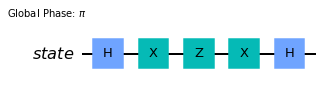

In [5]:
oracle = QuantumCircuit(len(score_list))
problem = AmplificationProblem(oracle, is_good_state=desired_score_string)
problem.grover_operator.decompose().draw(output='mpl')

In [ ]:
grover_circuits = []
for iteration in range(1,10001):
    grover = Grover(iterations=iteration)
    circuit = grover.construct_circuit(problem)
    circuit.measure_all()
    grover_circuits.append(circuit)